## import library

In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

## 데이터를 읽기와 feature X, label y 분리하기

In [159]:
url_csv = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/diabetes.csv"
df = pd.read_csv(url_csv) #웹주소
df_local = pd.read_csv("D:/Introduce to AI/diabetes.csv") #local csv
print("CSV local: D:/Introduce to AI/diabetes.csv \n",df_local.head(5))

print("_________________________________________________________________________ \n")

print("CSV from github_URL:  'https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/diabetes.csv' \n", df.head(5))
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print("_____________________________________________________________________\n")

print("features: ", X.columns.tolist())
print("label: ",y.name)

CSV local: D:/Introduce to AI/diabetes.csv 
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
_________________________________________________________________________ 

CSV from github_URL:  'https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/diabetes.csv' 
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0           

## 라벨 값이 이미 0과 1로 구성되어 있지만, 데이터 정규화를 더욱 일관되게 수행하기 위해 Label Encoding을 적용하기로 결정했습니다(chat gpt 잠고).

In [109]:
label_encoder = LabelEncoder()
y_encoder = label_encoder.fit_transform(y)

# 데이터를 학습용과 테스트용으로 나눕니다.

# 학습 데이터(X_train, y_train): 전체 데이터의 70% (test_size=0.3이므로 테스트 데이터는 30%)
# 테스트 데이터(X_test, y_test): 전체 데이터의 30%

In [112]:
X_train,X_test, y_train,y_test = train_test_split(X,y_encoder, test_size = 0.3, random_state = 42)

# Standardization: 특징들을 동일한 스케일로 변환하기 위해 정규화합니다 (평균 = 0, 표준 편차 = 1). 이는 KNN 알고리즘이 거리 기반으로 동작하기 때문에 매우 중요합니다.

In [115]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# KNN 모델을 초기화하고 X_train과 y_train 데이터로 학습시킵니다.(set neighbors = 5)

In [118]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

# X_test에서 X_train의 모든 점까지의 거리를 계산합니다.
# X_train에서 가장 가까운 5개의 이웃을 찾습니다.
# 가장 많이 등장하는 라벨을 예측값으로 선택합니다.

In [121]:
y_pred = knn.predict(X_test)

# y_pred와 y_test를 비교합니다.

In [124]:
print(y_pred)
print("-----------------------------")
print(y_test)

[0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0
 0 0 0 1 0 1 0 0 0]
-----------------------------
[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 0 1 1 0 0 0]


# print 차이점, accuracy

In [127]:
diff_indices = np.where(y_pred != y_test)[0]
print("Wrong: ")
for idx in diff_indices:
    print(f"Index: {idx}, y_test: {y_test[idx]}, y_pred: {y_pred[idx]}")

print(f"wrong total: {len(diff_indices)}")
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy * 100:.2f}%")

Wrong: 
Index: 4, y_test: 0, y_pred: 1
Index: 7, y_test: 0, y_pred: 1
Index: 8, y_test: 0, y_pred: 1
Index: 10, y_test: 1, y_pred: 0
Index: 12, y_test: 1, y_pred: 0
Index: 13, y_test: 0, y_pred: 1
Index: 19, y_test: 1, y_pred: 0
Index: 20, y_test: 0, y_pred: 1
Index: 24, y_test: 0, y_pred: 1
Index: 25, y_test: 1, y_pred: 0
Index: 28, y_test: 1, y_pred: 0
Index: 34, y_test: 0, y_pred: 1
Index: 37, y_test: 1, y_pred: 0
Index: 41, y_test: 0, y_pred: 1
Index: 42, y_test: 0, y_pred: 1
Index: 43, y_test: 1, y_pred: 0
Index: 45, y_test: 1, y_pred: 0
Index: 49, y_test: 0, y_pred: 1
Index: 53, y_test: 1, y_pred: 0
Index: 60, y_test: 1, y_pred: 0
Index: 62, y_test: 0, y_pred: 1
Index: 63, y_test: 1, y_pred: 0
Index: 65, y_test: 0, y_pred: 1
Index: 70, y_test: 0, y_pred: 1
Index: 73, y_test: 1, y_pred: 0
Index: 76, y_test: 0, y_pred: 1
Index: 81, y_test: 1, y_pred: 0
Index: 87, y_test: 1, y_pred: 0
Index: 93, y_test: 1, y_pred: 0
Index: 95, y_test: 0, y_pred: 1
Index: 96, y_test: 0, y_pred: 1
Ind

# 데이터의 시각화

y_test_value: [151, 80]
y_pred_value: [156, 75]


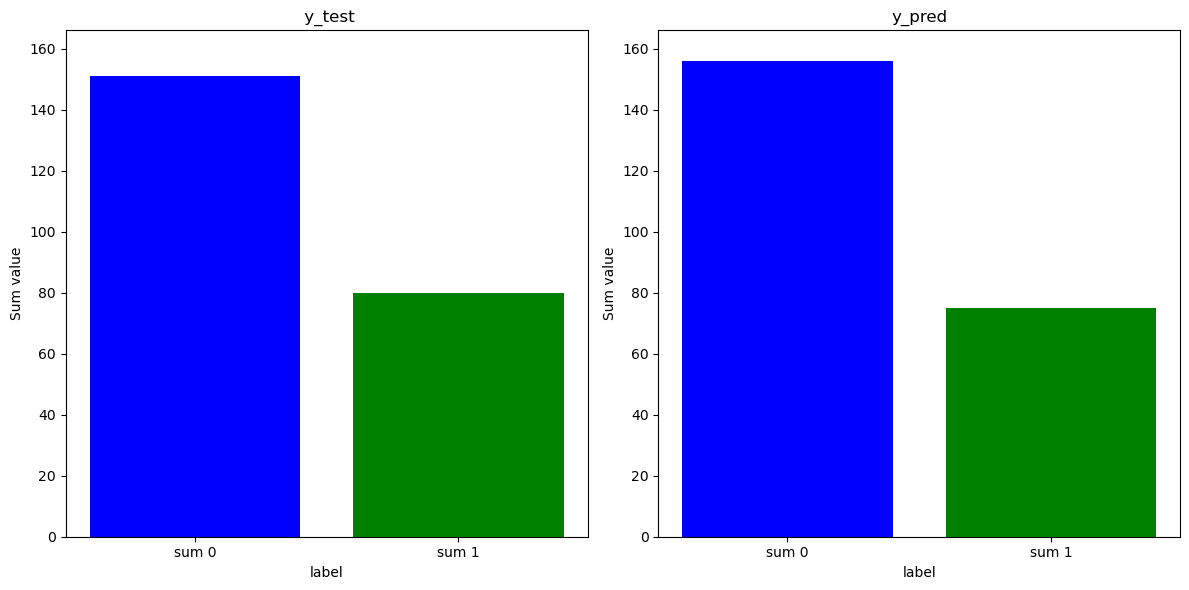

In [130]:
y_test_count_0 = np.sum(y_test == 0)
y_test_count_1 = np.sum(y_test == 1)
y_pred_count_0 = np.sum(y_pred == 0)
y_pred_count_1 = np.sum(y_pred == 1)

# data
labels = ["sum 0", "sum 1"]
y_test_value = [y_test_count_0, y_test_count_1]
y_pred_value = [y_pred_count_0, y_pred_count_1]


print("y_test_value:", y_test_value)
print("y_pred_value:", y_pred_value)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


ax1.bar(labels, y_test_value, color=['blue', 'green'])
ax1.set_title(" y_test")
ax1.set_xlabel("label")
ax1.set_ylabel("Sum value")
ax1.set_xticks(range(len(labels))) 
ax1.set_xticklabels(labels)         


ax2.bar(labels, y_pred_value, color=['blue', 'green'])
ax2.set_title("y_pred")
ax2.set_xlabel("label")
ax2.set_ylabel("Sum value")
ax2.set_xticks(range(len(labels)))  
ax2.set_xticklabels(labels)         

y_max = max(max(y_test_value), max(y_pred_value))  
y_min = 0  
ax1.set_ylim(y_min, y_max + 10)  
ax2.set_ylim(y_min, y_max + 10)

plt.tight_layout()
plt.show()